<a href="https://colab.research.google.com/github/Hambach-AA/File_manager_for_studying/blob/master/Lab_2_TAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библеотек

In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns  import  apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


Выполнение поиска частных наборов

In [19]:
def apyori_fun(dataset, min_thresholds):
  result = []
  times = []
  result_0 = apriori(dataset, min_support = 0.001, use_colnames  =  True)
  for i in range(len(min_thresholds)):
    time_1 = time.time()
    result.append(association_rules(result_0, metric = "confidence", min_threshold = min_thresholds[i]))
    time_2 = time.time()
    times.append(time_2 - time_1)
  return result, times

Вывод получивщихся результатов

In [6]:
def results(result, min_thresholds):
  for i in range(len(result)):
    print(min_thresholds[i])
    print("<---->")
    for j in range(len(result[i])):
      print("{}, {}".format(result[i]['antecedents'][j], result[i]['consequents'][j]))
    print("<---->")

Построение графика

In [7]:
def chart(result, min_thresholds, times):
  
  support = []
  for i in min_thresholds:
    support.append(str(i))

  quantity = []
  for i in range(len(result)):
    quantity.append(len(result[i]))

  plt.bar(support, times)
  plt.xlabel("Значение поддержки")
  plt.ylabel("Время работы")
  plt.show()

  plt.bar(support, quantity)
  plt.xlabel("Значение достоверности")
  plt.ylabel("Количество наборов")
  plt.show()

**Первый набор данных**

Подключение данных

In [16]:
data = pd.read_csv('Market_Basket_Optimisation.csv',encoding = "ISO-8859-1", header = None)
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])


encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
dataset = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)



Установка пароговых значений

In [21]:
min_thresholds = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Поиск и вывод результатов

0.7
<---->
frozenset({'pancakes', 'bacon'}), frozenset({'spaghetti'})
frozenset({'chocolate', 'barbecue sauce'}), frozenset({'mineral water'})
frozenset({'black tea', 'turkey'}), frozenset({'eggs'})
frozenset({'frozen smoothie', 'black tea'}), frozenset({'milk'})
frozenset({'salmon', 'black tea'}), frozenset({'mineral water'})
frozenset({'blueberries', 'eggs'}), frozenset({'mineral water'})
frozenset({'blueberries', 'pancakes'}), frozenset({'mineral water'})
frozenset({'rice', 'burgers'}), frozenset({'mineral water'})
frozenset({'cake', 'white wine'}), frozenset({'spaghetti'})
frozenset({'champagne', 'soup'}), frozenset({'mineral water'})
frozenset({'protein bar', 'chicken'}), frozenset({'spaghetti'})
frozenset({'red wine', 'tomato sauce'}), frozenset({'chocolate'})
frozenset({'fromage blanc', 'cooking oil'}), frozenset({'mineral water'})
frozenset({'whole wheat pasta', 'cooking oil'}), frozenset({'mineral water'})
frozenset({'red wine', 'cooking oil'}), frozenset({'spaghetti'})
frozen

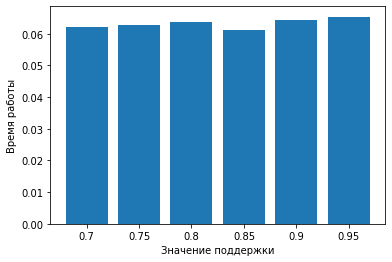

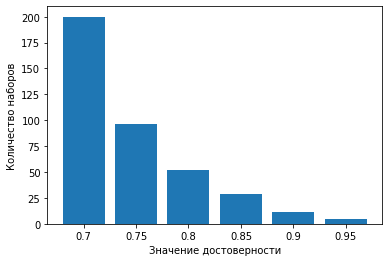

In [22]:
result, times = apyori_fun(dataset, min_thresholds)
results(result, min_thresholds)
chart(result, min_thresholds, times)